# Checking for correlations, flights dataframe

In [30]:
import pandas as pd
import numpy as np

In [17]:
path = '/Users/reneehall/Documents/Learning/lighthouse_labs/coursework-lighthouse-labs/Mid-term project/colab_data/'
fl_df = pd.read_csv(path+'cleaned_flights_sample.csv')

In [4]:
# check info on delays
fl_df[['dep_delay', 'arr_delay']].describe()

,dep_delay,arr_delay
count,600000.000000,600000.000000
mean,10.502537,5.585641
std,47.300555,50.124606
min,-272.000000,-260.000000
25%,-6.000000,-15.000000
50%,-2.000000,-6.000000
75%,8.000000,7.000000
max,1912.000000,2649.000000


In [14]:
print(fl_df.loc[fl_df['dep_delay'] < -20].dep_delay.count())
print(fl_df.loc[fl_df['dep_delay'] > 240].dep_delay.count())

667
3601


In [18]:
# remove outliers
fl_df = fl_df.loc[(fl_df['arr_delay'] < 240) & (fl_df['arr_delay'] > -60) & (fl_df['dep_delay'] > -20) & (fl_df['dep_delay'] < 240)]
fl_df.shape

(591670, 41)

In [24]:
num_vars = fl_df.select_dtypes(include=['int', 'float'])

In [25]:
num_vars.dtypes

mkt_carrier_fl_num       int64
op_carrier_fl_num        int64
origin_airport_id        int64
dest_airport_id          int64
crs_dep_time             int64
dep_time               float64
dep_delay              float64
taxi_out               float64
wheels_off             float64
wheels_on              float64
taxi_in                float64
crs_arr_time             int64
arr_time               float64
arr_delay              float64
cancelled              float64
diverted               float64
crs_elapsed_time       float64
actual_elapsed_time    float64
air_time               float64
flights                float64
distance               float64
carrier_delay          float64
weather_delay          float64
nas_delay              float64
security_delay         float64
late_aircraft_delay    float64
first_dep_time         float64
total_add_gtime        float64
longest_add_gtime      float64
dtype: object

In [38]:
def correlation(dataset, threshold):
    col_corr = set() # Set of all the names of deleted columns
    corr_matrix = dataset.corr()
    for i in range(len(corr_matrix.columns)):
        for j in range(i):
            if (corr_matrix.iloc[i, j] >= threshold) and (corr_matrix.columns[j] not in col_corr):
                colname = corr_matrix.columns[i] # getting the name of column
                col_corr.add(colname)
                if colname in dataset.columns:
                    del dataset[colname] # deleting the column from the dataset

    print(dataset)

In [43]:
corrmat = fl_df.corr()

In [50]:
import matplotlib.pyplot as plt
import seaborn as sns

<AxesSubplot:>

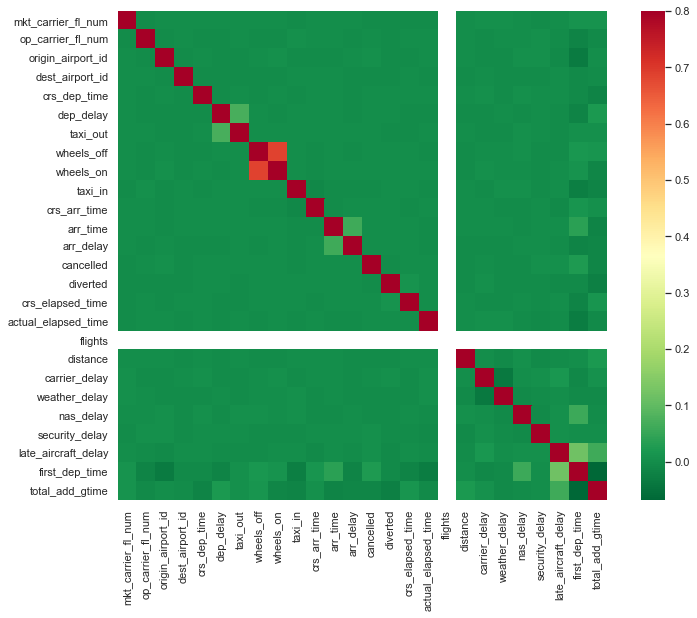

In [49]:
f,ax = plt.subplots(figsize=(12,9))
sns.heatmap(corrmat, vmax=.8, square=True, cmap='RdYlGn_r')